# Bitfinex CryptoCurrencies

In [1]:
import bitfinex
import datetime
import time
 
# Create api instance of the v2 API
api_v2 = bitfinex.bitfinex_v2.api_v2()

No keys, only access to public API functions


In [ ]:
def fetch_data(start, stop, symbol, interval, tick_limit, step):
    # Create api instance
    api_v2 = bitfinex.bitfinex_v2.api_v2()
    data = []
    start = start - step
    while start < stop:
        start = start + step
        end = start + step
        res = api_v2.candles(symbol=symbol, interval=interval,
                             limit=tick_limit, start=start,
                             end=end)
        data.extend(res)
        time.sleep(2)
    return data

In [ ]:
# Set step size
time_step = 60000000

In [ ]:
# Define query parameters
pair = 'btcusd' # Currency pair of interest
bin_size = '6m' # This will return minute data
limit = 1000    # We want the maximum of 1000 data points 

In [ ]:
# Define the start date
t_start = datetime.datetime(2009, 1, 1, 0, 0)
t_start = time.mktime(t_start.timetuple()) * 1000

In [ ]:
# Define the end date
t_stop = datetime.datetime(2019, 5, 1, 0, 0)
t_stop = time.mktime(t_stop.timetuple()) * 1000

In [ ]:
pair_data = fetch_data(start=t_start, stop=t_stop, symbol=pair,
                       interval=bin_size, tick_limit=limit, 
                       step=time_step)

In [ ]:
len(pair_data)

# Yahoo Finance - Stock Prices

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Define the instruments to download. We would like to see Nasdaq, Nikkei, SP500, ETF: SPDR, iShares MSCI Japan,MSCI UK, Germany
tickers = ['^IXIC', '^N225', '^GSPC', 'SPY', 'EWJ', 'EWU', 'EWG']

In [ ]:
# We would like all available data from 01/01/1970 until 05/01/2019.
start_date = '1970-01-02'
end_date = '2019-05-01'

In [ ]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [ ]:
panel_data.head()

In [ ]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

In [ ]:
# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)


In [ ]:
close.tail()

In [ ]:
plt.plot(close['^N225'].dropna())

# USD
FX from FRED

In [10]:
# Define the instruments to download. We would like to see JPYUSD,DKKUSD, CADUSD, USDGBP, KRWUSD, MXNUSD,BRZUSD,USDAUD, USDEUR
tickers = ['DEXUSNZ','DEXUSUK', 'DEXUSAL','DEXUSEU']

In [12]:
# We would like all available data from 01/01/1970 until 05/01/2019.
start_date = '1970-01-02'
end_date = '2019-06-07'

In [13]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'fred', start_date, end_date)

In [14]:
panel_data

,DEXUSNZ,DEXUSUK,DEXUSAL,DEXUSEU
DATE,,,,
1971-01-04,1.1138,2.3938,1.1127,NaN
1971-01-05,1.1143,2.3949,1.1132,NaN
1971-01-06,1.1151,2.3967,1.1140,NaN
1971-01-07,1.1150,2.3963,1.1138,NaN
1971-01-08,1.1154,2.3972,1.1124,NaN
1971-01-11,1.1163,2.3992,1.1152,NaN
1971-01-12,1.1167,2.4001,1.1156,NaN
1971-01-13,1.1177,2.4021,1.1165,NaN
1971-01-14,1.1200,2.4071,1.1189,NaN


In [15]:
panel_data.isnull().sum()

DEXUSNZ     500
DEXUSUK     484
DEXUSAL     491
DEXUSEU    7505
dtype: int64

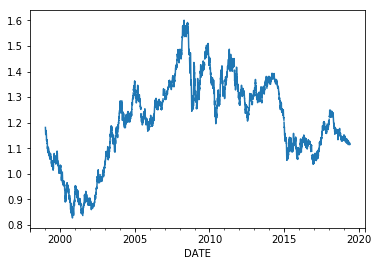

In [17]:
panel_data.DEXUSEU.plot()

In [18]:
panel_data.to_csv("USD_FX_rates.csv")

# Quandl for General FX data


For minute-wise FX: https://github.com/philipperemy/FX-1-Minute-Data